In [1]:
import sys
sys.path.append('/Users/reketejmakrety/Documents/random/corona')
from theory.epidemics.sir import * 
from theory.barabasi_albert import * 
import matplotlib.pyplot as plt

In [2]:
n = 10000
m = 5

edges, edge_basket = barabasi_albert_model(n, m)

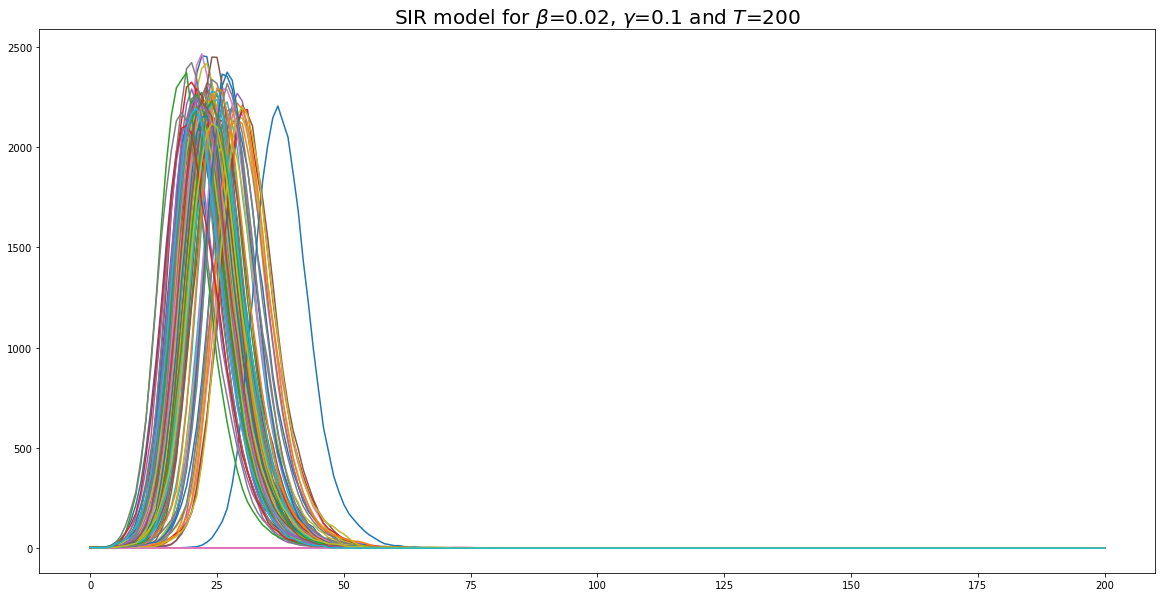

In [26]:
int_infected = 2
gamma = 0.1
beta = 0.02
T = 200
x = list(range(T + 1))

stats = []

plt.figure(figsize=(20, 10))
plt.title(fr'SIR model for $\beta$={beta}, $\gamma$={gamma} and $T$={T}', fontsize=20)
for i in range(100):
    infected_nodes = random.choice(list(range(n)), int_infected).tolist()
    I = [int_infected]
    S = [n - int_infected]
    R = [0]

    states = [0] * n
    for i in infected_nodes:
        states[i] = 1

    tau = None
    for t in range(T):
        states, tau = sir_model(n, edges, states, beta, gamma, tau)
        s, i, r = sir_absolute_counts(n, states)

        I.append(i)
        S.append(s)
        R.append(r)

    #plt.plot(x, S, label="Susceptible")
    plt.plot(x, I, label="Infected")
    #plt.plot(x, R, label="Removed")
    stats.append((S[-1], I[-1], R[-1]))
    

# plt.legend()
plt.show()

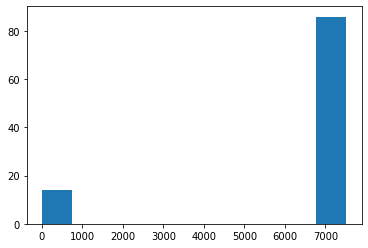

In [27]:
s, i, r = [], [], []
for p in stats:
    s.append(p[0])
    i.append(p[1])
    r.append(p[2])
plt.hist(r)
plt.show()